<a href="https://colab.research.google.com/github/thammathara/Python_Project/blob/main/pandas_foundation_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **Final Project - Analyzing Sales Data**
Date: 23 November 2022

Author: Thamma Tharasombat

Course: Pandas Foundation




In [ ]:
# import data
import pandas as pd
df = pd.read_csv("sample-store.csv")

In [ ]:
# preview top 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,6/12/2019,6/16/2019,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# shape of dataframe
df.shape

(9994, 21)

In [ ]:
# see data frame information using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

**Change the column name to lower case and remove the white space.**

In [ ]:
cols = df.columns
new_cols = [col.lower().replace(' ','_').replace('-','_') for col in cols]
df.columns = new_cols

**Convert order date and ship date to datetime in the original dataframe**

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%m/%d/%Y')
df['ship_date'] = pd.to_datetime(df['ship_date'], format='%m/%d/%Y')

df.tail()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country/region,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
9989,9990,CA-2017-110422,2017-01-21,2017-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2020-119914,2020-05-04,2020-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683.0,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


**Count nan in postal code column**

In [ ]:
df['postal_code'].isna().sum()

11

**Filter rows with missing values**

In [ ]:
df[df.isna().any(axis=1)]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country/region,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
2234,2235,CA-2020-104066,2020-12-05,2020-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0.0,67.6599
5274,5275,CA-2018-162887,2018-11-07,2018-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,...,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0.0,178.8000
8798,8799,US-2019-150140,2019-04-06,2019-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,...,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0.0,336.6350
9146,9147,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0.0,42.9914
9147,9148,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0.0,2.7336
9148,9149,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,13,0.0,406.7154
9386,9387,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,0.0,37.5624
9387,9388,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,0.0,5.7716
9388,9389,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,3,0.0,152.0232
9389,9390,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,1,0.0,0.9588


**Explore this dataset on your owns, ask your own questions**

Which regions has the highest profit percentage? 


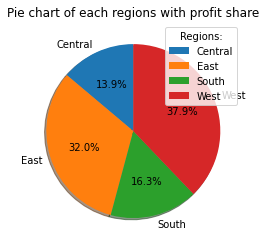

In [ ]:
print('Which regions has the highest profit percentage? ')
import matplotlib.pyplot as plt
import numpy as np

reg = ['Central', 'East','South', 'West']

y = df.groupby('region')['profit'].sum()

plt.pie(y ,labels = reg, startangle=90, shadow = True, autopct = '%1.1f%%')
plt.legend(title = "Regions:")
plt.title("Pie chart of each regions with profit share")
plt.show() 

In [ ]:
print('What is the minimum, maximum, median, mean, and sum for the quantity shipped of each segment? ')
df.groupby('segment')['quantity'].agg(['min', 'median','max','mean', 'sum']).reset_index()


What is the minimum, maximum, median, mean, and sum for the quantity shipped of each segment? 


,segment,min,median,max,mean,sum
0,Consumer,1,3.0,14,3.760547,19521
1,Corporate,1,3.0,14,3.843709,11608
2,Home Office,1,3.0,14,3.782389,6744


# **Data Analysis Part**

**How many columns, rows in this dataset?**

In [ ]:
print(f"rows: {df.shape[0]} ,columns: {df.shape[1]}")

rows: 9994 ,columns: 21


**Is there any missing values?, if there is, which colunm? how many nan values?**

In [ ]:
print(f"{df.isna().any().any()}, there are {df.postal_code.isna().sum()} missing values in the column called {list(df.columns[df.isna().any()])}.")
df.isna().sum().reset_index().sort_values(0,ascending=False). head(3)

True, there are 11 missing values in the column called ['postal_code'].


,index,0
11,postal_code,11
0,row_id,0
19,discount,0


**your friend ask for `California` data, filter it and export csv for him**

In [ ]:
california_df = df[df.state=='California']

#export to csv
california_df.to_csv('california_data.csv')

**your friend ask for all order data in `California` and `Texas` in 2017 (look at Order Date), send him csv file**

In [ ]:
calntex_df = df[(df.state.isin(['California','Texas'])) & (df.order_date.dt.year == 2017)]

#export to csv
california_df.to_csv('calntex_df')

**How much total sales, average sales, and standard deviation of sales your company make in 2017?**

In [ ]:
sales_2017 = df[(df['order_date'].dt.year == 2017)]['sales'].agg(['sum', 'mean', 'std']).reset_index()

round(sales_2017,2)

,index,sales
0,sum,484247.50
1,mean,242.97
2,std,754.05


**Which Segment has the highest profit in 2018?**

In [ ]:
profit_seg = df[(df['order_date'].dt.year == 2018)].groupby('segment')['profit'].sum().reset_index()\
    .sort_values('profit',ascending=False)

print("Customer segments profit the most, followed by channel segments. ")

round(profit_seg,2)

Customer segments profit the most, followed by channel segments. 


,segment,profit
0,Consumer,28460.17
1,Corporate,20688.32
2,Home Office,12470.11


**Which top 5 States have the least total sales between 15 April 2019 - 31 December 2019?**

In [ ]:
#select data that date between 15 April 2019 - 31 December 2019
df_date = df[df["order_date"].between('2019/04/15', '2019/12/31', inclusive = True) ]

lowest_sales = df_date.groupby('state')['sales'].sum().sort_values().head().reset_index()

print('Between April 15, 2019 and December 31, 2019, New Hampshire had the lowest total sales. ')
lowest_sales

Between April 15, 2019 and December 31, 2019, New Hampshire had the lowest total sales. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  


,state,sales
0,New Hampshire,49.05
1,New Mexico,64.08
2,District of Columbia,117.07
3,Louisiana,249.80
4,South Carolina,502.48


**What is the proportion of total sales (%) in West + Central in 2019 e.g. 25% ?**

In [ ]:
regi_sales = df[(df['order_date'].dt.year == 2019)].groupby('region')['sales'].sum()
tolal_sales = df[(df['order_date'].dt.year == 2019)].sales.sum()

sales_2019 = round((regi_sales/tolal_sales)*100,2).reset_index()

centralnwest = sales_2019[(sales_2019["region"]=="West") | (sales_2019["region"]=="Central")].sum()

print(sales_2019)
print("Total sales (%) in West and Central is equal to:", centralnwest)


    region  sales
0  Central  24.20
1     East  29.66
2    South  15.37
3     West  30.77
Total sales (%) in West and Central is equal to: region    CentralWest
sales           54.97
dtype: object


**find top 10 popular products in terms of number of orders vs. total sales during 2019-2020**

In [ ]:
df_date1920 = df[df["order_date"].between('2019/01/01', '2020/12/31', inclusive = True) ]

sum_sales = df_date1920.groupby('product_name')['sales'].sum().reset_index().sort_values("sales", ascending=False).head(10)
count_sales = df_date1920.groupby('product_name')['sales'].count().reset_index().sort_values("sales", ascending=False).head(10)
print("Top 10 popular products by orders:",count_sales) 
print("Top 10 popular products by total sales:", round(sum_sales,2))


Top 10 popular products by orders:                                          product_name  sales
512                                 Easy-staple paper     27
1412                                          Staples     24
1406                                  Staple envelope     22
1413                          Staples in misc. colors     13
1409                                   Staple remover     12
1421                          Storex Dura Pro Binders     12
411                Chromcraft Round Conference Tables     12
732   Global Wood Trimmed Manager's Task Chair, Khaki     11
250                           Avery Non-Stick Binders     11
1410                       Staple-based wall hangings     10
Top 10 popular products by total sales:                                            product_name     sales
388               Canon imageCLASS 2200 Advanced Copier  61599.82
765                Hewlett Packard LaserJet 3310 Copier  16079.73
18     3D Systems Cube Printer, 2nd Generation, Magenta 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  """Entry point for launching an IPython kernel.


**plot at least 2 plots, any plot you think interesting :)**

What is the most popular ship mode in 2020?


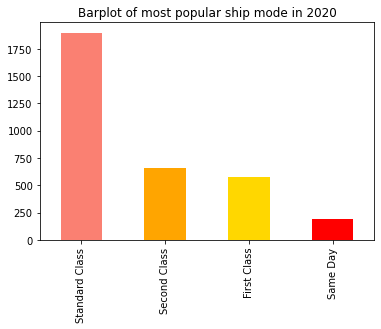

In [ ]:
df_2020 = df[df['order_date'].dt.year == 2020]
df_2020['ship_mode'].value_counts().plot(kind = 'bar', color = ['salmon', 'orange', 'gold', 'red']);
plt.title("Barplot of most popular ship mode in 2020")
print("What is the most popular ship mode in 2020?")

What does the segment profit and sales trend line look like?


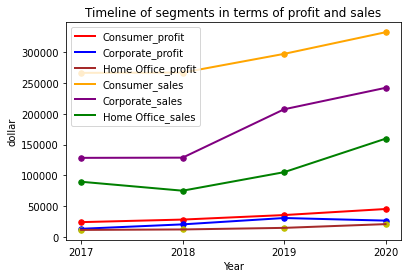

In [ ]:
df["year"] = df["order_date"].dt.strftime("%Y")

#profit
cons_pro = df[df["segment"] == 'Consumer'].groupby("year")["profit"].agg("sum").reset_index()
corp_pro = df[df["segment"] == 'Corporate'].groupby("year")["profit"].agg("sum").reset_index()
home_pro = df[df["segment"] == 'Home Office'].groupby("year")["profit"].agg("sum").reset_index()

plt.scatter(cons_pro.year, cons_pro.profit, color='r', s = 30)
plt.scatter(corp_pro.year, corp_pro.profit, color='b', s = 30)
plt.scatter(home_pro.year, home_pro.profit, color='y', s = 30)
plt.plot(cons_pro.year, cons_pro.profit, color='r', label="Consumer_profit",linewidth = '2')
plt.plot(corp_pro.year, corp_pro.profit, color='b', label="Corporate_profit",linewidth = '2')
plt.plot(home_pro.year, home_pro.profit, color='brown', label="Home Office_profit",linewidth = '2')

#sales
cons_sal = df[df["segment"] == 'Consumer'].groupby("year")["sales"].agg("sum").reset_index()
corp_sal = df[df["segment"] == 'Corporate'].groupby("year")["sales"].agg("sum").reset_index()
home_sal = df[df["segment"] == 'Home Office'].groupby("year")["sales"].agg("sum").reset_index()

plt.scatter(cons_sal.year, cons_sal.sales, color='orange', s = 30)
plt.scatter(corp_sal.year, corp_sal.sales, color='purple', s = 30)
plt.scatter(home_sal.year, home_sal.sales, color='g', s = 30)
plt.plot(cons_sal.year, cons_sal.sales, color='orange', label="Consumer_sales",linewidth = '2')
plt.plot(corp_sal.year, corp_sal.sales, color='purple', label="Corporate_sales",linewidth = '2')
plt.plot(home_sal.year, home_sal.sales, color='g', label="Home Office_sales",linewidth = '2')

plt.title("Timeline of segments in terms of profit and sales")
plt.xlabel("Year")
plt.ylabel("dollar")
plt.legend()

print("What does the segment profit and sales trend line look like?")

**use np.where() to create new column in dataframe to help you answer your own questions**

what is the timeline of profit loss look like?


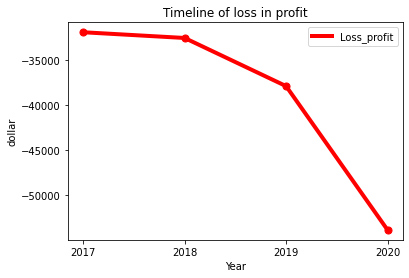

In [ ]:
df["loss"] = np.where(df["profit"] <= 0, "Loss_money","Gain_money")
lost_df = df[(df["loss"] == "Loss_money")]

yr_loss = lost_df.groupby("year")["profit"].agg("sum").reset_index()

plt.scatter(yr_loss.year, yr_loss.profit, color='r', s = 50)
plt.plot(yr_loss.year, yr_loss.profit, color='r', label="Loss_profit",linewidth = '4')

plt.title("Timeline of loss in profit")
plt.xlabel("Year")
plt.ylabel("dollar")
plt.legend()

print("what is the timeline of profit loss look like?")